# Characterizing the Ly$\alpha$ Forest with $f(N)$ [v1.1]

In [1]:
import numpy as np
from imp import reload
from matplotlib import pylab as plt
from linetools.guis import xspecgui

from astropy import units as u

from pyigm.fN import mockforest as pyimock
from pyigm.fN.fnmodel import FNModel
from pyigm.fN import tau_eff as pyiteff

from bokeh.io import output_notebook, show, output_file
from bokeh.layouts import column

from bokeh.plotting import figure
from bokeh.models import Range1d

output_notebook()

-----------------------------------------------------------
-----------------------------------------------------------
 Install pymc if you want it
-----------------------------------------------------------


Loading BokehJS ...

In [2]:
# For presentation
pwdth = 600  
phght = 400
# For laptop
#pwdth = 800
#phght = 600

In [3]:
def plot_hist(*args,**kwargs):
    """
    Quick histogram plot

    Parameters
    ----------
    binsz : float 
      Width of the bin
    ax : Matplot pyplot
      Useful for sub plots
    noshow : boolean (False) 
      Set keyword to True to not show to screen
    noclear : boolean (False) 
      Set keyword to True to not clear the figure
    xmnx : tuple, optional
      (xmin, xmax) for plotting
    """
    # Error checking
    if len(args) == 0:
        print('x_guis.simple_splot: No arguments!')
        return
    
    if not isinstance(args[0],np.ndarray):
        print('x_guis: Input array is not a numpy.ndarray!')
        return

    plt_dict = {}

    # Bin size
    if not 'alpha' in kwargs:
        kwargs['alpha'] = 1.

    # Bin size
    if not 'binsz' in kwargs:
        if 'xrng' in kwargs:
            tmp = args[0].flatten()
            idx = np.where((tmp > kwargs['xrng'][0]) & (tmp < kwargs['xrng'][1]))[0]
            kwargs['binsz'] = float(np.std(tmp[idx])/5.)
        else:
            kwargs['binsz'] = float(np.std(args[0].flatten())/5.)
    #pdb.set_trace()

    # Clear
    if (not 'noclear' in kwargs) and (not 'ax' in kwargs):
        plt.clf()

    # Ax
    if not 'ax' in kwargs:
        ax = plt
    else:
        ax = kwargs['ax']
    
    # Plot 
    #pdb.set_trace()
    if len(args) == 1:
        arr = args[0].flatten()

        # Find the range
        if 'xrng' not in kwargs:
            minv = np.amin(arr)
            maxv = np.amax(arr)
        else:
            minv = kwargs['xrng'][0]
            maxv = kwargs['xrng'][1]
        # Set the boundaries sensibly given binsz
        i0 = int( minv / kwargs['binsz']) - 1
        i1 = int( maxv / kwargs['binsz']) + 1
        rng = tuple( kwargs['binsz']*np.array([i0,i1]) )
        nbin = i1-i0
        # Histogram
        hist, edges = np.histogram(arr, range=rng, bins=nbin)
        ax.bar(edges[:-1], hist, width=kwargs['binsz'], alpha=kwargs['alpha'])
        # Labels
        if 'xlabel' in kwargs:
            try:
                ax.set_xlabel(kwargs['xlabel'])
            except: 
                ax.xlabel(kwargs['xlabel'])
        if 'xmnx' in kwargs:
            ax.set_xlim(kwargs['xmnx'])
    else: 
        pdb.set_trace() # Not ready for this yet
        for kk in range(1,len(args)):
            fig.plot(args[0].flatten(),args[kk].flatten())

    # Finish
    if (not 'noshow' in kwargs) and (not 'ax' in kwargs):
        plt.show()

----

## Mock Spectra

In [4]:
# Quasar
zem = 2.5

In [5]:
# Spectral properties
s2n = 10.
sampling = 2.
R = 2000.

## $\tau_{\rm eff, \alpha}$

### Power-law $f(N)$

In [9]:
from pyigm.fN import fnmodel as pyifnm

In [12]:
# Initialize f(N,X)
reload(pyifnm)
kim13 = dict(B=8.59, beta=-1.6)  # this is in dX space, not dz
powerfN = pyifnm.FNModel('PowerLaw', zmnx=(2.0,3.2), param=kim13)
powerfN.evaluate((15., 2.5), None)  # f(N,X)


-15.391116309037969

In [10]:
iwave = 1000*(1+3.0)
#iwave2 = (1000*(1+2.8)/1026)*1216
zem = 3.0 # Needs to be higher than our redshift of interest
cumul = []
#z2 = 1000*(1+2.8)/1216-1
#iwave3= 1216*(1000*(1+2.8)/1216)
#zem2 = 2.3iteff
fN_model = FNModel.default_model()
teff_test = pyiteff.lyman_ew(iwave, zem, fN_model, NHI_MIN=19.0, NHI_MAX=22.0, cumul=cumul,bval = 24)

print (teff_test)

Using P14 spline values to generate a default model
Loading: /Users/Jenny/Documents/pycodes/pyigm-fussing_with_fN/pyigm/data/fN/fN_spline_z24.fits.gz
read_sets: Using set file -- 
  /Users/Jenny/Documents/pycodes/linetools/linetools/lists/sets/llist_v1.2.ascii
Loading abundances from Asplund2009
Abundances are relative by number on a logarithmic scale with H=12
0.020716766231323548


In [14]:

zi = np.arange(2.2,4.5,0.01)
teff_test = []
for ii in zi:
    iwave = 1000*(1+ii)
#iwave2 = (1000*(1+2.8)/1026)*1216
    zem = ii # Needs to be higher than our redshift of interest
    cumul = []
#z2 = 1000*(1+2.8)/1216-1
#iwave3= 1216*(1000*(1+2.8)/1216)
#zem2 = 2.3iteff
    fN_model = FNModel.default_model()
    teff_test.append(pyiteff.lyman_ew(iwave, zem, fN_model, NHI_MIN=17.2, NHI_MAX=22.0, cumul=cumul,bval = 24))
    
    

Using P14 spline values to generate a default model
Loading: /Users/Jenny/Documents/pycodes/pyigm-fussing_with_fN/pyigm/data/fN/fN_spline_z24.fits.gz
Loading abundances from Asplund2009
Abundances are relative by number on a logarithmic scale with H=12
Using P14 spline values to generate a default model
Loading: /Users/Jenny/Documents/pycodes/pyigm-fussing_with_fN/pyigm/data/fN/fN_spline_z24.fits.gz
Loading abundances from Asplund2009
Abundances are relative by number on a logarithmic scale with H=12
Using P14 spline values to generate a default model
Loading: /Users/Jenny/Documents/pycodes/pyigm-fussing_with_fN/pyigm/data/fN/fN_spline_z24.fits.gz
Loading abundances from Asplund2009
Abundances are relative by number on a logarithmic scale with H=12
Using P14 spline values to generate a default model
Loading: /Users/Jenny/Documents/pycodes/pyigm-fussing_with_fN/pyigm/data/fN/fN_spline_z24.fits.gz
Loading abundances from Asplund2009
Abundances are relative by number on a logarithmic scal

Loading abundances from Asplund2009
Abundances are relative by number on a logarithmic scale with H=12
Using P14 spline values to generate a default model
Loading: /Users/Jenny/Documents/pycodes/pyigm-fussing_with_fN/pyigm/data/fN/fN_spline_z24.fits.gz
Loading abundances from Asplund2009
Abundances are relative by number on a logarithmic scale with H=12
Using P14 spline values to generate a default model
Loading: /Users/Jenny/Documents/pycodes/pyigm-fussing_with_fN/pyigm/data/fN/fN_spline_z24.fits.gz
Loading abundances from Asplund2009
Abundances are relative by number on a logarithmic scale with H=12
Using P14 spline values to generate a default model
Loading: /Users/Jenny/Documents/pycodes/pyigm-fussing_with_fN/pyigm/data/fN/fN_spline_z24.fits.gz
Loading abundances from Asplund2009
Abundances are relative by number on a logarithmic scale with H=12
Using P14 spline values to generate a default model
Loading: /Users/Jenny/Documents/pycodes/pyigm-fussing_with_fN/pyigm/data/fN/fN_spline_

Loading abundances from Asplund2009
Abundances are relative by number on a logarithmic scale with H=12
Using P14 spline values to generate a default model
Loading: /Users/Jenny/Documents/pycodes/pyigm-fussing_with_fN/pyigm/data/fN/fN_spline_z24.fits.gz
Loading abundances from Asplund2009
Abundances are relative by number on a logarithmic scale with H=12
Using P14 spline values to generate a default model
Loading: /Users/Jenny/Documents/pycodes/pyigm-fussing_with_fN/pyigm/data/fN/fN_spline_z24.fits.gz
Loading abundances from Asplund2009
Abundances are relative by number on a logarithmic scale with H=12
Using P14 spline values to generate a default model
Loading: /Users/Jenny/Documents/pycodes/pyigm-fussing_with_fN/pyigm/data/fN/fN_spline_z24.fits.gz
Loading abundances from Asplund2009
Abundances are relative by number on a logarithmic scale with H=12
Using P14 spline values to generate a default model
Loading: /Users/Jenny/Documents/pycodes/pyigm-fussing_with_fN/pyigm/data/fN/fN_spline_

Loading abundances from Asplund2009
Abundances are relative by number on a logarithmic scale with H=12
Using P14 spline values to generate a default model
Loading: /Users/Jenny/Documents/pycodes/pyigm-fussing_with_fN/pyigm/data/fN/fN_spline_z24.fits.gz
Loading abundances from Asplund2009
Abundances are relative by number on a logarithmic scale with H=12
Using P14 spline values to generate a default model
Loading: /Users/Jenny/Documents/pycodes/pyigm-fussing_with_fN/pyigm/data/fN/fN_spline_z24.fits.gz
Loading abundances from Asplund2009
Abundances are relative by number on a logarithmic scale with H=12
Using P14 spline values to generate a default model
Loading: /Users/Jenny/Documents/pycodes/pyigm-fussing_with_fN/pyigm/data/fN/fN_spline_z24.fits.gz
Loading abundances from Asplund2009
Abundances are relative by number on a logarithmic scale with H=12
Using P14 spline values to generate a default model
Loading: /Users/Jenny/Documents/pycodes/pyigm-fussing_with_fN/pyigm/data/fN/fN_spline_

Loading abundances from Asplund2009
Abundances are relative by number on a logarithmic scale with H=12
Using P14 spline values to generate a default model
Loading: /Users/Jenny/Documents/pycodes/pyigm-fussing_with_fN/pyigm/data/fN/fN_spline_z24.fits.gz
Loading abundances from Asplund2009
Abundances are relative by number on a logarithmic scale with H=12
Using P14 spline values to generate a default model
Loading: /Users/Jenny/Documents/pycodes/pyigm-fussing_with_fN/pyigm/data/fN/fN_spline_z24.fits.gz
Loading abundances from Asplund2009
Abundances are relative by number on a logarithmic scale with H=12
Using P14 spline values to generate a default model
Loading: /Users/Jenny/Documents/pycodes/pyigm-fussing_with_fN/pyigm/data/fN/fN_spline_z24.fits.gz
Loading abundances from Asplund2009
Abundances are relative by number on a logarithmic scale with H=12
Using P14 spline values to generate a default model
Loading: /Users/Jenny/Documents/pycodes/pyigm-fussing_with_fN/pyigm/data/fN/fN_spline_

Loading abundances from Asplund2009
Abundances are relative by number on a logarithmic scale with H=12
Using P14 spline values to generate a default model
Loading: /Users/Jenny/Documents/pycodes/pyigm-fussing_with_fN/pyigm/data/fN/fN_spline_z24.fits.gz
Loading abundances from Asplund2009
Abundances are relative by number on a logarithmic scale with H=12
Using P14 spline values to generate a default model
Loading: /Users/Jenny/Documents/pycodes/pyigm-fussing_with_fN/pyigm/data/fN/fN_spline_z24.fits.gz
Loading abundances from Asplund2009
Abundances are relative by number on a logarithmic scale with H=12
Using P14 spline values to generate a default model
Loading: /Users/Jenny/Documents/pycodes/pyigm-fussing_with_fN/pyigm/data/fN/fN_spline_z24.fits.gz
Loading abundances from Asplund2009
Abundances are relative by number on a logarithmic scale with H=12
Using P14 spline values to generate a default model
Loading: /Users/Jenny/Documents/pycodes/pyigm-fussing_with_fN/pyigm/data/fN/fN_spline_

Loading abundances from Asplund2009
Abundances are relative by number on a logarithmic scale with H=12
Using P14 spline values to generate a default model
Loading: /Users/Jenny/Documents/pycodes/pyigm-fussing_with_fN/pyigm/data/fN/fN_spline_z24.fits.gz
Loading abundances from Asplund2009
Abundances are relative by number on a logarithmic scale with H=12
Using P14 spline values to generate a default model
Loading: /Users/Jenny/Documents/pycodes/pyigm-fussing_with_fN/pyigm/data/fN/fN_spline_z24.fits.gz
Loading abundances from Asplund2009
Abundances are relative by number on a logarithmic scale with H=12
Using P14 spline values to generate a default model
Loading: /Users/Jenny/Documents/pycodes/pyigm-fussing_with_fN/pyigm/data/fN/fN_spline_z24.fits.gz
Loading abundances from Asplund2009
Abundances are relative by number on a logarithmic scale with H=12
Using P14 spline values to generate a default model
Loading: /Users/Jenny/Documents/pycodes/pyigm-fussing_with_fN/pyigm/data/fN/fN_spline_

In [38]:
teff_test

[0.0120772741920205,
 0.012196575730254292,
 0.012316631187838495,
 0.012437442831471168,
 0.01255901292874715,
 0.012681343748145236,
 0.012804437559016385,
 0.012928296631571839,
 0.013052923236871284,
 0.0131783196468109,
 0.013304488134112481,
 0.013431430972311219,
 0.01355915043574503,
 0.01368764879954314,
 0.013816928339615451,
 0.013946991332640928,
 0.014077840056057634,
 0.014209476788051848,
 0.014341903807547397,
 0.014475123394195693,
 0.014609137828364989,
 0.014743949391130856,
 0.01487956036426609,
 0.01501597303023048,
 0.015153189672161723,
 0.015291212573865391,
 0.015430044019805716,
 0.01556968629509595,
 0.015710141685489638,
 0.015851412477371405,
 0.015993500957747573,
 0.016136409414238054,
 0.016280140135066734,
 0.01642469540905368,
 0.016570077525606484,
 0.01671628877471127,
 0.016863331446925513,
 0.017011207833368795,
 0.017159920225715716,
 0.017309470916187186,
 0.017459862197543145,
 0.01761109636307486,
 0.017763175706597068,
 0.01791610252244062,
 0

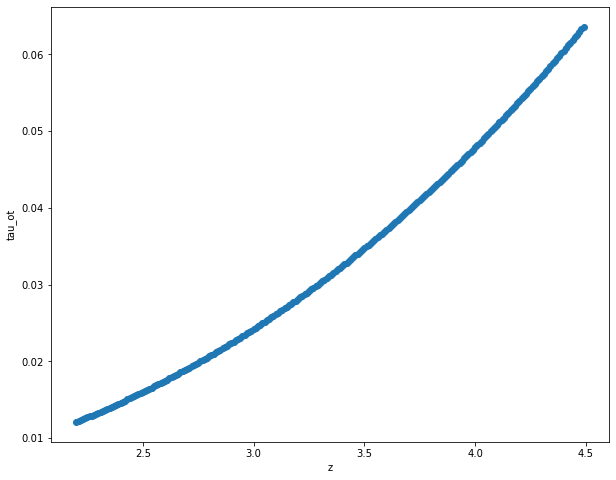

In [39]:
plt.figure(figsize=(10,8))
plt.scatter(zi,teff_test)
plt.ylabel('tau_ot')
plt.xlabel('z')
plt.show()

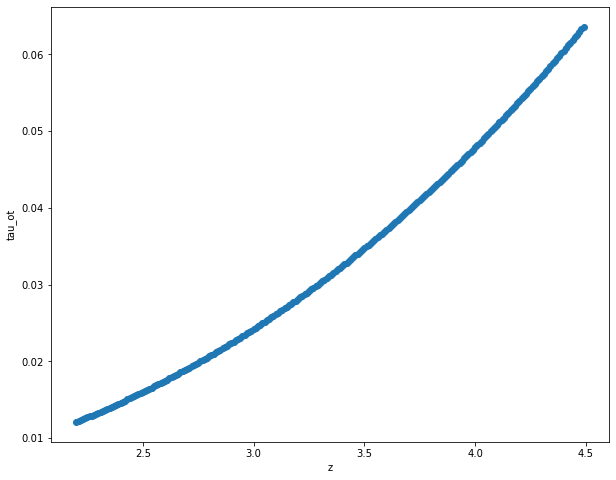

In [42]:
plt.figure(figsize=(10,8))
plt.scatter(zi,teff_test)
plt.ylabel('tau_ot')
plt.xlabel('z')
plt.show()

In [16]:
np.savetxt("fn_otcorrection_2.3-4.5_17-22.txt", np.c_[zi,teff_test], delimiter="  ",newline='\n')


Loading abundances from Asplund2009
Abundances are relative by number on a logarithmic scale with H=12
Loading abundances from Asplund2009
Abundances are relative by number on a logarithmic scale with H=12
Loading abundances from Asplund2009
Abundances are relative by number on a logarithmic scale with H=12
Loading abundances from Asplund2009
Abundances are relative by number on a logarithmic scale with H=12
Loading abundances from Asplund2009
Abundances are relative by number on a logarithmic scale with H=12
Loading abundances from Asplund2009
Abundances are relative by number on a logarithmic scale with H=12
Loading abundances from Asplund2009
Abundances are relative by number on a logarithmic scale with H=12
Loading abundances from Asplund2009
Abundances are relative by number on a logarithmic scale with H=12
Loading abundances from Asplund2009
Abundances are relative by number on a logarithmic scale with H=12
Loading abundances from Asplund2009
Abundances are relative by number on 

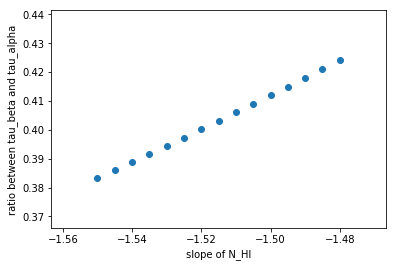

In [27]:
ratio = []
beta = []
#betai = 
#print (betai)
for betai in np.arange(-1.55,-1.48,0.005):
    reload(pyifnm)
    kim13 = dict(B=8.59, beta=betai)  # this is in dX space, not dz
    powerfN = pyifnm.FNModel('PowerLaw', zmnx=(2.0,3.2), param=kim13)
    iwave = 1000*(1+2.8)
    iwave2 = (1000*(1+2.8)/1026)*1216
    zem = 2.8 # Needs to be higher than our redshift of interest
    cumul = []
    z2 = 1000*(1+2.8)/1216-1
    iwave3= 1216*(1000*(1+2.8)/1216)
    zem2 = 2.3
    teff_beta=(pyiteff.lyman_ew(iwave, zem, powerfN, NHI_MIN=12.0, NHI_MAX=18, cumul=cumul,bval = 24))
    teff_alpha=(pyiteff.lyman_ew(iwave2,zem, powerfN, NHI_MIN=12.0, NHI_MAX=18, cumul=cumul,bval = 24))
    teff_alpha2=(pyiteff.lyman_ew(iwave3,zem2, powerfN, NHI_MIN=12.0, NHI_MAX=18, cumul=cumul,bval = 24))
    ratio.append((teff_beta-teff_alpha2)/(teff_alpha))
    beta.append(betai)
    #print (teff_alpha,teff_beta,betai,ratio)

plt.scatter(beta,ratio)
plt.ylabel('ratio between tau_beta and tau_alpha')
plt.xlabel('slope of N_HI')
plt.show()

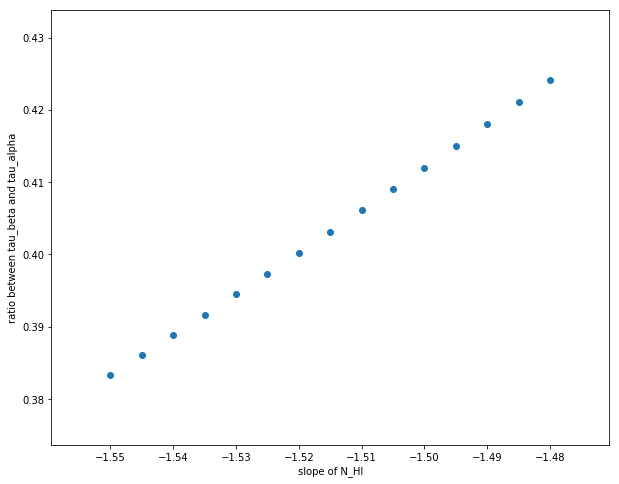

In [28]:
plt.figure(figsize=(10,8))
plt.scatter(beta,ratio)
plt.ylabel('ratio between tau_beta and tau_alpha')
plt.xlabel('slope of N_HI')
plt.show()